# Insert dataset and have a check

Import panda and input "mushroom.csv" dataset as "data" and use head() to have a look with the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import rcParams
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,zero_one_loss,accuracy_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('dataset/mushrooms.csv')
data_copy = data['class']
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## dataset information

Use info() to show the information of the dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Check any missing data in the dataset

Use isnull( ) and isna( ) to check if there is any missing or empty data in the dataset, one of the method of data cleaning

In [3]:
null_data = data.isnull().sum().sum()
nan_data = data.isna().sum().sum()

print('amount of null data: %s'%(null_data))
print('amount of nan data: %s'%(nan_data))

amount of null data: 0
amount of nan data: 0


# Check any wrong data

We compare the value name between the dataset in the csv file and kaggle to check for wrong values

In [4]:
for i in range(0,data.shape[1]):
    print(data[data.columns[i]].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

Convert the data from string to int (data transfer)to help us to find any relationship
we also extract the numerical data using to_csv( )under the dataset folder

In [5]:
new_data = data
for i in range(0,data.shape[1]):
    new_data[new_data.columns[i]] = pd.factorize(new_data[new_data.columns[i]])[0]

In [6]:
new_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


Now to check the new dataset that we just extract for wrong data

In [7]:
for i in range(0,23):
    print(data[data.columns[i]].value_counts())


1    4208
0    3916
Name: class, dtype: int64
0    3656
3    3152
4     828
1     452
2      32
5       4
Name: cap-shape, dtype: int64
1    3244
0    2556
2    2320
3       4
Name: cap-surface, dtype: int64
0    2284
3    1840
4    1500
1    1072
2    1040
6     168
5     144
8      44
7      16
9      16
Name: cap-color, dtype: int64
1    4748
0    3376
Name: bruises, dtype: int64
3    3528
4    2160
7     576
6     576
2     400
1     400
0     256
5     192
8      36
Name: odor, dtype: int64
0    7914
1     210
Name: gill-attachment, dtype: int64
0    6812
1    1312
Name: gill-spacing, dtype: int64
1    5612
0    2512
Name: gill-size, dtype: int64
8     1728
3     1492
4     1202
1     1048
2      752
5      732
6      492
0      408
7       96
10      86
11      64
9       24
Name: gill-color, dtype: int64
1    4608
0    3516
Name: stalk-shape, dtype: int64
2    3776
4    2480
0    1120
1     556
3     192
Name: stalk-root, dtype: int64
0    5176
2    2372
1     552
3      24
Name

# ML

In [8]:
x = data.drop(columns=['class'])
y = data['class']
x_n = normalize(x)
kfold = KFold(n_splits=10)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=42)

### Kbest

#### Define kbest

In [9]:
K=5
features_all = data.columns[1:]
select_best_K = SelectKBest(mutual_info_classif, k=K)
select_best_K.fit(data[features_all], data['class'])

print(select_best_K.get_support(indices=True))
data_bestK = data[features_all[select_best_K.get_support()]]
print(data_bestK.columns)
data_bestK[:5]

[ 4  8 11 18 19]
Index(['odor', 'gill-color', 'stalk-surface-above-ring', 'ring-type',
       'spore-print-color'],
      dtype='object')


,odor,gill-color,stalk-surface-above-ring,ring-type,spore-print-color
0,0,0,0,0,0
1,1,0,0,0,1
2,2,1,0,0,1
3,0,1,0,0,0
4,3,0,0,1,1


#### Cross Validation with kbest

In [10]:
bestk_Xtrain, bestk_Xtest, bestk_ytrain, bestk_ytest = train_test_split(data_bestK, y, test_size=0.4, random_state=42)

clf1 = SVC(kernel='linear', C=1)
scores = cross_val_score(clf1, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("SVC(kernel='linear', C=1): ", round(np.mean(scores),2))
clf2 = SVC(kernel='rbf', C=1, gamma = 'auto')
scores = cross_val_score(clf2, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("SVC(kernel='rbf', C=1, gamma = 'auto'): ", round(np.mean(scores),2))
clf3 = KNeighborsClassifier()
scores = cross_val_score(clf3, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("KNeighborsClassifier(): ", round(np.mean(scores),2))
clf4 = DecisionTreeClassifier()
scores = cross_val_score(clf4, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("DecisionTreeClassifier(): ", round(np.mean(scores),2))
clf5 = MLPClassifier(max_iter=1000)
scores = cross_val_score(clf5, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("MLPClassifier(max_iter=1000): ", round(np.mean(scores),2))
clf6 = GaussianNB()
scores = cross_val_score(clf6, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("GaussianNB(): ", round(np.mean(scores),2))
clf7 = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf7, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("RandomForestClassifier(n_estimators=10): ", round(np.mean(scores),2))
clf8 = AdaBoostClassifier()
scores = cross_val_score(clf8, bestk_Xtest, bestk_ytest, cv=10, scoring='accuracy') 
print("AdaBoostClassifier(): ", round(np.mean(scores),2))

SVC(kernel='linear', C=1):  0.95
SVC(kernel='rbf', C=1, gamma = 'auto'):  1.0
KNeighborsClassifier():  1.0
DecisionTreeClassifier():  1.0
MLPClassifier(max_iter=1000):  1.0
GaussianNB():  0.89
RandomForestClassifier(n_estimators=10):  1.0
AdaBoostClassifier():  1.0


### KNN

#### Before performance tuning

In [11]:
#Trainning
KNN = KNeighborsClassifier()
KNN.fit(Xtrain, ytrain)
#Prediction
yprdict = KNN.predict(Xtest)
#Evaluation
error = zero_one_loss(ytest,yprdict)
accuracy = accuracy_score(ytest,yprdict)

In [12]:
print('The error and accuracy before performance tunning are ' + str(round(error,2)) + ' and ' + str(round(accuracy*100,2)) +'%'+ ' respectively')

The error and accuracy before performance tunning are 0.0 and 100.0% respectively


#### Performance tuning

In [13]:
KNN_param_grid = [{'n_neighbors': [3, 5, 10, 15], 'weights': ['uniform','distance'], 'algorithm': ['auto', 'ball_tree','kd_tree']}]
KNN_grid = GridSearchCV(KNN, KNN_param_grid, cv=10,scoring = 'accuracy').fit(Xtrain, ytrain)

In [14]:
print('The best parameters are -')
KNN_grid.best_params_

The best parameters are -


{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

#### After performance tuning

In [16]:
#Trainning the decision tree
KNN_perf = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance').fit(Xtrain, ytrain)
#Predict on test set
yprdict = KNN_perf.predict(Xtest)
KNN_yaccuracy = accuracy_score(ytest,yprdict)
print("ytest accuracy:",KNN_yaccuracy)

ytest accuracy: 1.0


[0.99958974 0.99979466 0.99917907 0.9993844  0.99548549 0.99876839
 0.99322719 0.99610025 0.99958974 0.99979466 0.99917907 0.9993844
 0.99569041 0.99876839 0.99281693 0.99630558 0.99958974 0.99979466
 0.99917907 0.9993844  0.99548549 0.99876839 0.99322719 0.99610025]


Text(0, 0.5, 'Cross-Validated Accuracy')

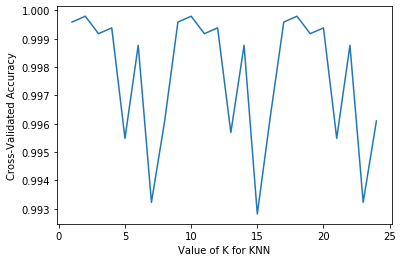

In [17]:
k_values = list(range(1,25))
KNN_grid_mean_scores = KNN_grid.cv_results_['mean_test_score']
print(KNN_grid_mean_scores)
plt.plot(k_values, KNN_grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [24]:
#evaluation
KNN_cn_maxtrix = confusion_matrix(ytest,yprdict)
print('The classification eror or loss is {}.\n'.format(round(zero_one_loss(ytest,yprdict,2))))
print(classification_report(ytest,yprdict))
KNN_accuracy = accuracy_score(ytest,yprdict)

KNN_best_model = KNN_grid.best_estimator_ 
print("==========  Best results by KNN ============")
KNN_best_model.fit(Xtrain, ytrain)
KNN_best_predict = KNN_best_model.predict(Xtest)

KNN_best_acc = metrics.accuracy_score(ytest,KNN_best_predict)
print ("Best Testing Accuracy is: {}".format(KNN_best_acc))
print("------------------------------------------------------------------------------------")
KNN_best_f1_score = metrics.f1_score(ytest,KNN_best_predict,average='weighted')
print ("Best F1 score is: {}".format(KNN_best_f1_score))
print("------------------------------------------------------------------------------------")
KNN_confusion_mtrx = confusion_matrix(ytest,KNN_best_predict)
print ("THE CONFUSION MATRIX IS AS FOLLOWS: \n{}" .format(KNN_confusion_mtrx))
print("------------------------------------------------------------------------------------")
KNN_Classification_report = classification_report(ytest,KNN_best_predict)
print ("MultiCLass Averaged Scores: \n{}" .format(KNN_Classification_report))
KNN_cn_maxtrix = confusion_matrix(ytest,yprdict)
print('The classification eror or loss is {}.\n'.format(round(zero_one_loss(ytest,yprdict,2))))

The classification eror or loss is 0.0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

==========  Best results by KNN ============
Best Testing Accuracy is: 1.0
------------------------------------------------------------------------------------
Best F1 score is: 1.0
------------------------------------------------------------------------------------
THE CONFUSION MATRIX IS AS FOLLOWS: 
[[1572    0]
 [   0 1678]]
------------------------------------------------------------------------------------
MultiCLass Averaged Scores: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy           

### RandomForest

#### Before performance tuning

In [25]:
#Trainning
RF = RandomForestClassifier(random_state = 17)
RF.fit(Xtrain, ytrain)
#Prediction
yprdict = RF.predict(Xtest)
#Evaluation
error = zero_one_loss(ytest,yprdict)
accuracy = accuracy_score(ytest,yprdict)

In [26]:
print('The error and accuracy before performance tunning are ' + str(round(error,2)) + ' and ' + str(round(accuracy*100,2)) +'%'+ ' respectively')

The error and accuracy before performance tunning are 0.0 and 100.0% respectively


####  Performance tuning

In [27]:
param_grid = [{'n_estimators': [30,50,70,100], 'criterion': ['gini','entropy'], 
               'max_depth': [6,8,10,12]}]
RF_grid = GridSearchCV(RF, param_grid, cv=10,scoring = 'accuracy').fit(Xtrain, ytrain)

In [28]:
print('The best parameters are -')
RF_grid.best_params_

The best parameters are -


{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 30}

#### After performance tuning

In [29]:
#Trainning the decision tree
RF_perf = RandomForestClassifier(criterion = 'gini', max_depth = 8, n_estimators = 30).fit(Xtrain, ytrain)
#Predict on test set
yprdict =RF_perf.predict(Xtest)

In [30]:
#evaluation
RF_cn_maxtrix = confusion_matrix(ytest,yprdict)
print(RF_cn_maxtrix)
print('The classification eror or loss is {}.\n'.format(round(zero_one_loss(ytest,yprdict,2))))
print(classification_report(ytest,yprdict))
RF_yaccuracy = accuracy_score(ytest,yprdict)
print("ytest accuracy:", RF_yaccuracy)

[[1572    0]
 [   0 1678]]
The classification eror or loss is 0.0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

ytest accuracy: 1.0


       
== Checking best scores and doing validation before we run clf ==========
Best CV accuracy: 1.0
------------------------------------------------------------------------------------
The Best parameter based on score=accuracy is:  {'max_depth': 300, 'n_estimators': 200}
------------------------------------------------------------------------------------
Best model parameters: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
== Plotting the Surface Plot for the given Data ==========
[1. 1. 1. 1.

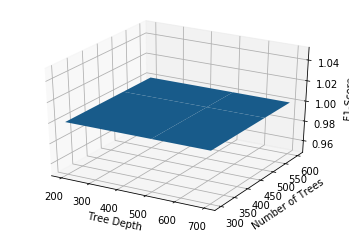

In [32]:
tree_depth = [300,500,600]
no_of_trees = [200,500,700]

RF_param_grid = dict(n_estimators=no_of_trees, max_depth=tree_depth) #Mapping number of trees and maximum tree depth into the parameter grid.
RF_clf=RandomForestClassifier(random_state=42) #Running Random Forest Classifier with random state parameter.
RF_grid = GridSearchCV(RF_clf,RF_param_grid, n_jobs=-1,cv=10,scoring='accuracy').fit(Xtrain, ytrain) #Fitting the training data into the rfc grid.

print("       ")
print("== Checking best scores and doing validation before we run clf ==========")

print("Best CV accuracy:", RF_grid.best_score_)
print("------------------------------------------------------------------------------------")
print ("The Best parameter based on score=accuracy is:  {}" .format(RF_grid.best_params_))
print("------------------------------------------------------------------------------------")
print("Best model parameters:", RF_grid.best_estimator_)


print("== Plotting the Surface Plot for the given Data ==========")

RF_grid_mean_scores = RF_grid.cv_results_['mean_test_score']
print(RF_grid_mean_scores)

z =0
g = tree_depth 
h = no_of_trees

m_r = np.zeros([3,3])
for o in range(0,3):
    for p in range(0,3):
        m_r[o,p]=RF_grid_mean_scores[z]
        z=z+1


G, H = np.meshgrid(h, g) 

I = m_r
print (G)
print (H)
print (m_r)
fig = plt.figure()
ax2 = fig.gca(projection='3d')

surf2 = ax2.plot_surface(G, H, I, rstride=1, cstride=1, antialiased=True)


ax2.set_xlabel('Tree Depth')
ax2.set_ylabel('Number of Trees')
ax2.set_zlabel('F1-Score')
plt.show()

### performance on Xtest

In [34]:
RF_best_model = RF_grid.best_estimator_

print("==========  Best results by DT on X_test ============")

RF_best_model.fit(Xtrain, ytrain)
RF_best_predict = RF_best_model.predict(Xtest)

RF_best_acc = metrics.accuracy_score(ytest,RF_best_predict)
print ("Best Testing Accuracy is: {}".format(RF_best_acc))
print("------------------------------------------------------------------------------------")
RF_best_f1_score = metrics.f1_score(ytest,RF_best_predict,average='weighted')
print ("Best F1 score is: {}".format(RF_best_f1_score))
print("------------------------------------------------------------------------------------")
RF_confusion_mtrx = confusion_matrix(ytest,RF_best_predict)
print ("THE CONFUSION MATRIX IS AS FOLLOWS: \n{}" .format(RF_confusion_mtrx))
print("------------------------------------------------------------------------------------")
RF_Classification_report = classification_report(ytest,RF_best_predict)
print ("MultiCLass Averaged Scores: \n{}" .format(RF_Classification_report))

==========  Best results by DT on X_test ============
Best Testing Accuracy is: 1.0
------------------------------------------------------------------------------------
Best F1 score is: 1.0
------------------------------------------------------------------------------------
THE CONFUSION MATRIX IS AS FOLLOWS: 
[[1572    0]
 [   0 1678]]
------------------------------------------------------------------------------------
MultiCLass Averaged Scores: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



### SVC

#### Before performance tuning

In [35]:
#Trainning
svc = SVC(random_state = 17)
svc.fit(Xtrain, ytrain)
#Prediction
yprdict = svc.predict(Xtest)
#Evaluation
error = zero_one_loss(ytest,yprdict)
accuracy = accuracy_score(ytest,yprdict)

In [36]:
print('The error and accuracy before performance tunning are ' + str(round(error,2)) + ' and ' + str(round(accuracy*100,2)) +'%'+ ' respectively')

The error and accuracy before performance tunning are 0.0 and 99.91% respectively


#### Performance tuning

In [37]:
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf'], 'gamma': [0.001, 0.0001]}]
svc_grid = GridSearchCV(svc, param_grid, cv=10,scoring = 'accuracy').fit(Xtrain, ytrain)

In [38]:
print('The best parameters are -')
svc_grid.best_params_

The best parameters are -


{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

#### After performance tuning

In [40]:
#Trainning the decision tree
svc_perf = SVC(C = 10, gamma = 0.001, kernel = 'linear').fit(Xtrain, ytrain)
#Predict on test set
yprdict =svc_perf.predict(Xtest)
svc_yaccuracy = accuracy_score(ytest,yprdict)
print("ytest accuracy:",svc_yaccuracy)
svc_Classification_report = classification_report(ytest,yprdict)
print (svc_Classification_report)

ytest accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



### SVM with RBF Kernel

       
== Checking best scores and doing validation before we run clf ==========
Best CV accuracy: 1.0
------------------------------------------------------------------------------------
The Best parameter based on score=accuracy is:  {'C': 100, 'gamma': 0.001}
------------------------------------------------------------------------------------
Best model parameters: SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
== Plotting the Surface Plot for the given Data ==========
[0.94891187 0.85412066 0.98522781 0.9441916  1.         0.9755853
 1.         0.98297076]
[[   1   10  100 1000]
 [   1   10  100 1000]]
[[0.001  0.001  0.001  0.001 ]
 [0.0001 0.0001 0.0001 0.0001]]
[[0.94891187 0.85412066 0.98522781 0.9441916 ]
 [1.         0.9755853  1.         0.98297076]]


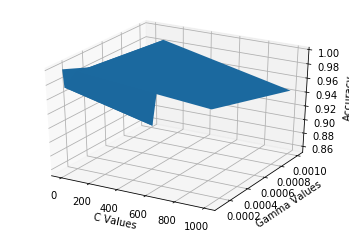

In [42]:
gamma_value = [1e-3, 1e-4]
C_value = [1,10,100,1000]

SVM_param_grid = dict(C=C_value, gamma=gamma_value) #Mapping the Values into the SVM Model's grid.

SVM_clf =SVC(kernel='rbf') #Running SVC function by calling it with radial basis function kernel.
SVM_grid = GridSearchCV(SVM_clf, SVM_param_grid, n_jobs=-1,cv=10,scoring='accuracy').fit(Xtrain, ytrain) #Performing GridSearchCV with cross-validation 

print("       ")
print("== Checking best scores and doing validation before we run clf ==========")

print("Best CV accuracy:", SVM_grid.best_score_)
print("------------------------------------------------------------------------------------")
print ("The Best parameter based on score=accuracy is:  {}" .format(SVM_grid.best_params_))
print("------------------------------------------------------------------------------------")
print("Best model parameters:", SVM_grid.best_estimator_)


print("== Plotting the Surface Plot for the given Data ==========")

SVM_grid_mean_scores = SVM_grid.cv_results_['mean_test_score']
print(SVM_grid_mean_scores)

y =0
d = gamma_value 
e = C_value

m_s = np.zeros([2,4])
for k in range(0,2):
    for l in range(0,4):
        m_s[k,l]=SVM_grid_mean_scores[y]
        y=y+1


D, E = np.meshgrid(e, d) 

F = m_s
print (D)
print (E)
print (m_s)
fig = plt.figure()
ax1 = fig.gca(projection='3d')

surf1 = ax1.plot_surface(D, E, F, rstride=1, cstride=1, antialiased=True)

ax1.set_xlabel('C Values')
ax1.set_ylabel('Gamma Values')
ax1.set_zlabel('Accuracy')
plt.show()

#### performance on X_test

In [48]:
SVM_best_model = SVM_grid.best_estimator_

print("==========  Best results by SVM on X_test ============")

SVM_best_model.fit(Xtrain, ytrain)
SVM_best_predict = SVM_best_model.predict(Xtest)

SVM_best_acc = metrics.accuracy_score(ytest,SVM_best_predict)
print ("Best Testing Accuracy is: {}".format(SVM_best_acc))
print("------------------------------------------------------------------------------------")
SVM_best_f1_score = metrics.f1_score(ytest,SVM_best_predict,average='weighted')
print ("Best F1 score is: {}".format(SVM_best_f1_score))
print("------------------------------------------------------------------------------------")
SVM_confusion_mtrx = confusion_matrix(ytest,SVM_best_predict)
print ("THE CONFUSION MATRIX IS AS FOLLOWS: \n{}" .format(SVM_confusion_mtrx))
print("------------------------------------------------------------------------------------")
SVM_Classification_report = classification_report(ytest,SVM_best_predict)
print ("MultiCLass Averaged Scores: \n{}" .format(SVM_Classification_report))

==========  Best results by SVM on X_test ============
Best Testing Accuracy is: 1.0
------------------------------------------------------------------------------------
Best F1 score is: 1.0
------------------------------------------------------------------------------------
THE CONFUSION MATRIX IS AS FOLLOWS: 
[[1572    0]
 [   0 1678]]
------------------------------------------------------------------------------------
MultiCLass Averaged Scores: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



### Logistic Regression with Elastic Net

In [50]:
al = [1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
l =[0,0.15,0.5,0.7,1]

SGDC_parameter_grid = dict(l1_ratio=l, alpha=al) #Mapping the alpha and L1-ratio into the grid.
SGDC_clf = SGDClassifier(penalty='elasticnet') #Running the SGDClassifier to perform Elastic Net.
SGDC_grid = GridSearchCV(SGDC_clf, SGDC_parameter_grid, n_jobs=-1,cv=10,scoring='accuracy').fit(Xtrain, ytrain) #Performing GridSearchCV with cross validation function 

       
== Checking best scores and doing validation before we run clf ==========
Best CV accuracy: 0.9952784697209411
------------------------------------------------------------------------------------
The Best parameter based on score=accuracy is:  {'alpha': 0.0001, 'l1_ratio': 0.7}
------------------------------------------------------------------------------------
Best model parameters: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.7, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)
== Plotting the Surface Plot for the given Data ==========
[0.97537407 0.98276332 0.98542515 0.99527847 0.98953614 0.9770172
 0.98399788 0.9893329  0.99302395 0

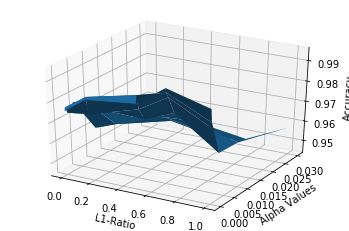

In [51]:
print("       ")
print("== Checking best scores and doing validation before we run clf ==========")

print("Best CV accuracy:", SGDC_grid.best_score_)
print("------------------------------------------------------------------------------------")
print ("The Best parameter based on score=accuracy is:  {}" .format(SGDC_grid.best_params_))
print("------------------------------------------------------------------------------------")
print("Best model parameters:", SGDC_grid.best_estimator_)

print("== Plotting the Surface Plot for the given Data ==========")
SGDC_grid_mean_scores = SGDC_grid.cv_results_['mean_test_score']
print(SGDC_grid_mean_scores)

x =0
a = al 
b = l 

m = np.zeros([6,5])
for i in range(0,6):
    for j in range(0,5):
        m[i,j]=SGDC_grid_mean_scores[x]
        x=x+1


A, B = np.meshgrid(b, a) 

C = m
print (A)
print (B)
print (m)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A, B, C, rstride=1, cstride=1, antialiased=True)


ax.set_xlabel('L1-Ratio')
ax.set_ylabel('Alpha Values')
ax.set_zlabel('Accuracy')
plt.show()

#### Performance on Xtest

In [54]:
#  FINAL: results on X_test  
SGDC_best_model = SGDC_grid.best_estimator_
print("==========  Best results by Logistic Regression on X_test ============")
SGDC_best_model.fit(Xtrain, ytrain)
SGDC_best_predict = SGDC_best_model.predict(Xtest)
SGDC_best_acc = metrics.accuracy_score(ytest,SGDC_best_predict)
print ("Best Testing Accuracy is: {}".format(SGDC_best_acc))
print("------------------------------------------------------------------------------------")
SGDC_best_f1_score = metrics.f1_score(ytest,SGDC_best_predict,average='weighted')
print ("Best F1 score is: {}".format(SGDC_best_f1_score))
print("------------------------------------------------------------------------------------")
SGDC_confusion_mtrx = confusion_matrix(ytest,SGDC_best_predict)
print ("THE CONFUSION MATRIX IS AS FOLLOWS: \n{}" .format(SGDC_confusion_mtrx))
print("------------------------------------------------------------------------------------")
SGDC_Classification_report = classification_report(ytest,SGDC_best_predict)
print ("MultiCLass Averaged Scores: \n{}" .format(SGDC_Classification_report))

==========  Best results by Logistic Regression on X_test ============
Best Testing Accuracy is: 1.0
------------------------------------------------------------------------------------
Best F1 score is: 1.0
------------------------------------------------------------------------------------
THE CONFUSION MATRIX IS AS FOLLOWS: 
[[1572    0]
 [   0 1678]]
------------------------------------------------------------------------------------
MultiCLass Averaged Scores: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



### Desision Tree

#### Before performance tuning

In [16]:
#Trainning
DT = DecisionTreeClassifier(random_state=17)
DT.fit(Xtrain, ytrain)
#Prediction
yprdict = DT.predict(Xtest)
#Evaluation
error = zero_one_loss(ytest,yprdict)
accuracy = accuracy_score(ytest,yprdict)

In [17]:
print('The error and accuracy before performance tunning are ' + str(round(error,2)) + ' and ' + str(round(accuracy*100,2)) +'%'+ ' respectively')

The error and accuracy before performance tunning are 0.0 and 100.0% respectively


#### Performance tuning

In [18]:
param_grid = {'max_depth': [6,8,10,12,14], 'criterion': ['gini','entropy']}
DT_grid = GridSearchCV(DT, param_grid, cv=10,scoring = 'accuracy').fit(Xtrain, ytrain)

In [19]:
print('The best parameters are -')
DT_grid.best_params_

The best parameters are -


{'criterion': 'entropy', 'max_depth': 6}

#### After performance tuning

In [20]:
#Trainning the decision tree
DT_perf = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy').fit(Xtrain, ytrain)
#Predict on test set
yprdict = DT_perf.predict(Xtest)

In [21]:
#evaluation
cn_maxtrix = confusion_matrix(ytest,yprdict)
print('The classification eror or loss is {}.\n'.format(round(zero_one_loss(ytest,yprdict,2))))
print(classification_report(ytest,yprdict))
DT_yaccuracy = accuracy_score(ytest,yprdict)
print("ytest accuracy:",DT_yaccuracy)

The classification eror or loss is 0.0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

ytest accuracy: 1.0


### Neural Networks

#### Before performance tuning

In [61]:
#Trainning
NN = MLPClassifier(random_state = 17)
NN.fit(Xtrain, ytrain)
#Prediction
yprdict = NN.predict(Xtest)
#Evaluation
error = zero_one_loss(ytest,yprdict)
accuracy = accuracy_score(ytest,yprdict)

In [62]:
print('The error and accuracy before performance tunning are ' + str(round(error,2)) + ' and ' + str(round(accuracy*100,2)) +'%'+ ' respectively')

The error and accuracy before performance tunning are 0.0 and 100.0% respectively


#### performance tuning

In [63]:
param_grid = {'learning_rate_init': [0.001,0.01,0.1], 'alpha': [0.0001,0.001,0.1]}
NN_grid = GridSearchCV(NN, param_grid, cv=10,scoring = 'accuracy').fit(Xtrain, ytrain)

In [64]:
print('The best parameters are -')
NN_grid.best_params_

The best parameters are -


{'alpha': 0.0001, 'learning_rate_init': 0.001}

#### After performance tuning

In [65]:
#Trainning the decision tree
NN_perf = MLPClassifier(random_state=17, learning_rate_init = 0.001,alpha =  0.0001).fit(Xtrain, ytrain)
#Predict on test set
yprdict = NN_perf.predict(Xtest)

In [66]:
#evaluation
print('The classification eror or loss is {}.\n'.format(round(zero_one_loss(ytest,yprdict,2))))
print(classification_report(ytest,yprdict))
NN_yaccuracy = accuracy_score(ytest,yprdict)
print("ytest accuracy:",NN_yaccuracy)

The classification eror or loss is 0.0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

ytest accuracy: 1.0


### visualization

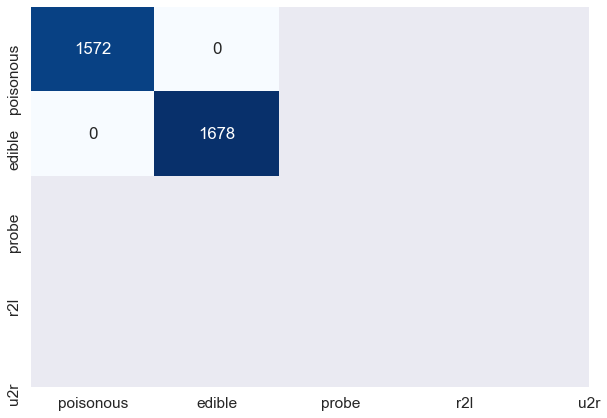

In [67]:
#plot confusion matrix
cn_matrix = confusion_matrix(ytest,yprdict)
labels = ['poisonous','edible','probe','r2l','u2r']
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4) #for label size
sns.heatmap(cn_matrix, annot = True, fmt = 'g',cmap = plt.cm.Blues, xticklabels = labels, yticklabels = labels, cbar = False)
plt.show()

### Compare Y Accuracy

In [68]:
YAccuracy = {'Decision Tree': DT_yaccuracy*100, 'Neural Networks': NN_yaccuracy*100,
            'SVC': svc_yaccuracy*100,'KNN': KNN_yaccuracy*100,'Random Forest': RF_yaccuracy*100}

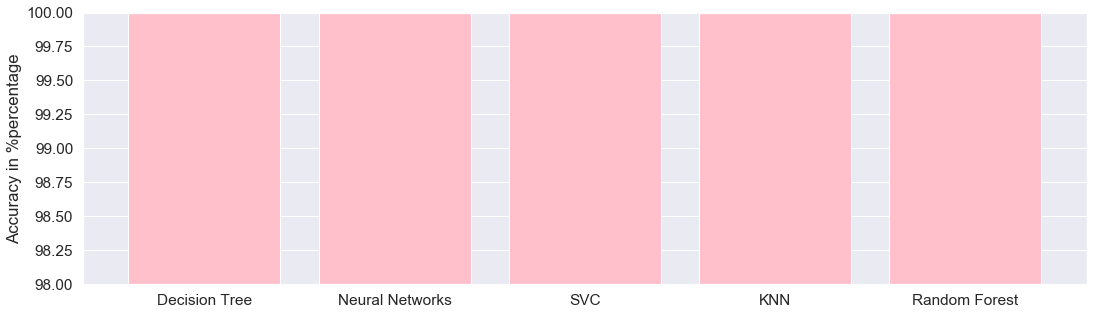

In [69]:
#plot horizontal bar graph for attack type categories
f,ax = plt.subplots(figsize = (18,5))
plt.bar(YAccuracy.keys(),YAccuracy.values(),color = 'pink')
plt.ylim(bottom=98,top = 100)
plt.ylabel('Accuracy in %percentage')
plt.show()

### Compare Xtest Accuracy

In [70]:
XAccuracy = {'KNN': KNN_best_acc*100, 'SVM': SVM_best_acc*100,
            'Logical Regression': SGDC_best_acc*100,'Random Forest': RF_best_acc*100}

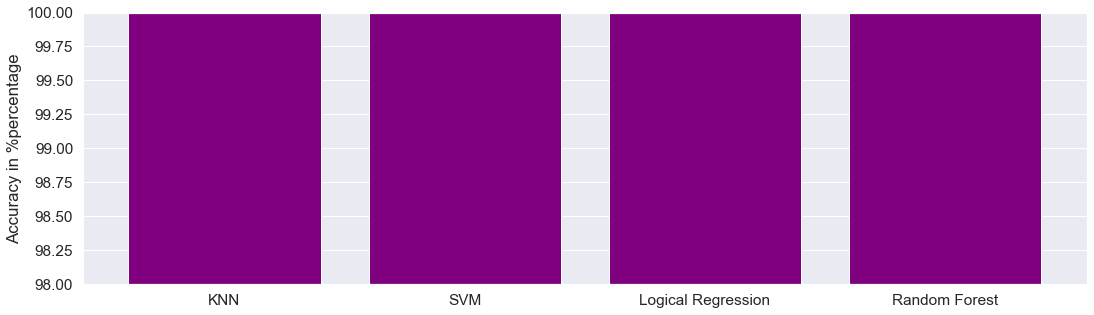

In [71]:
#plot horizontal bar graph for attack type categories
f,ax = plt.subplots(figsize = (18,5))
plt.bar(XAccuracy.keys(),XAccuracy.values(),color = 'purple')
plt.ylim(bottom=98,top = 100)
plt.ylabel('Accuracy in %percentage')
plt.show()

### Decision Tree

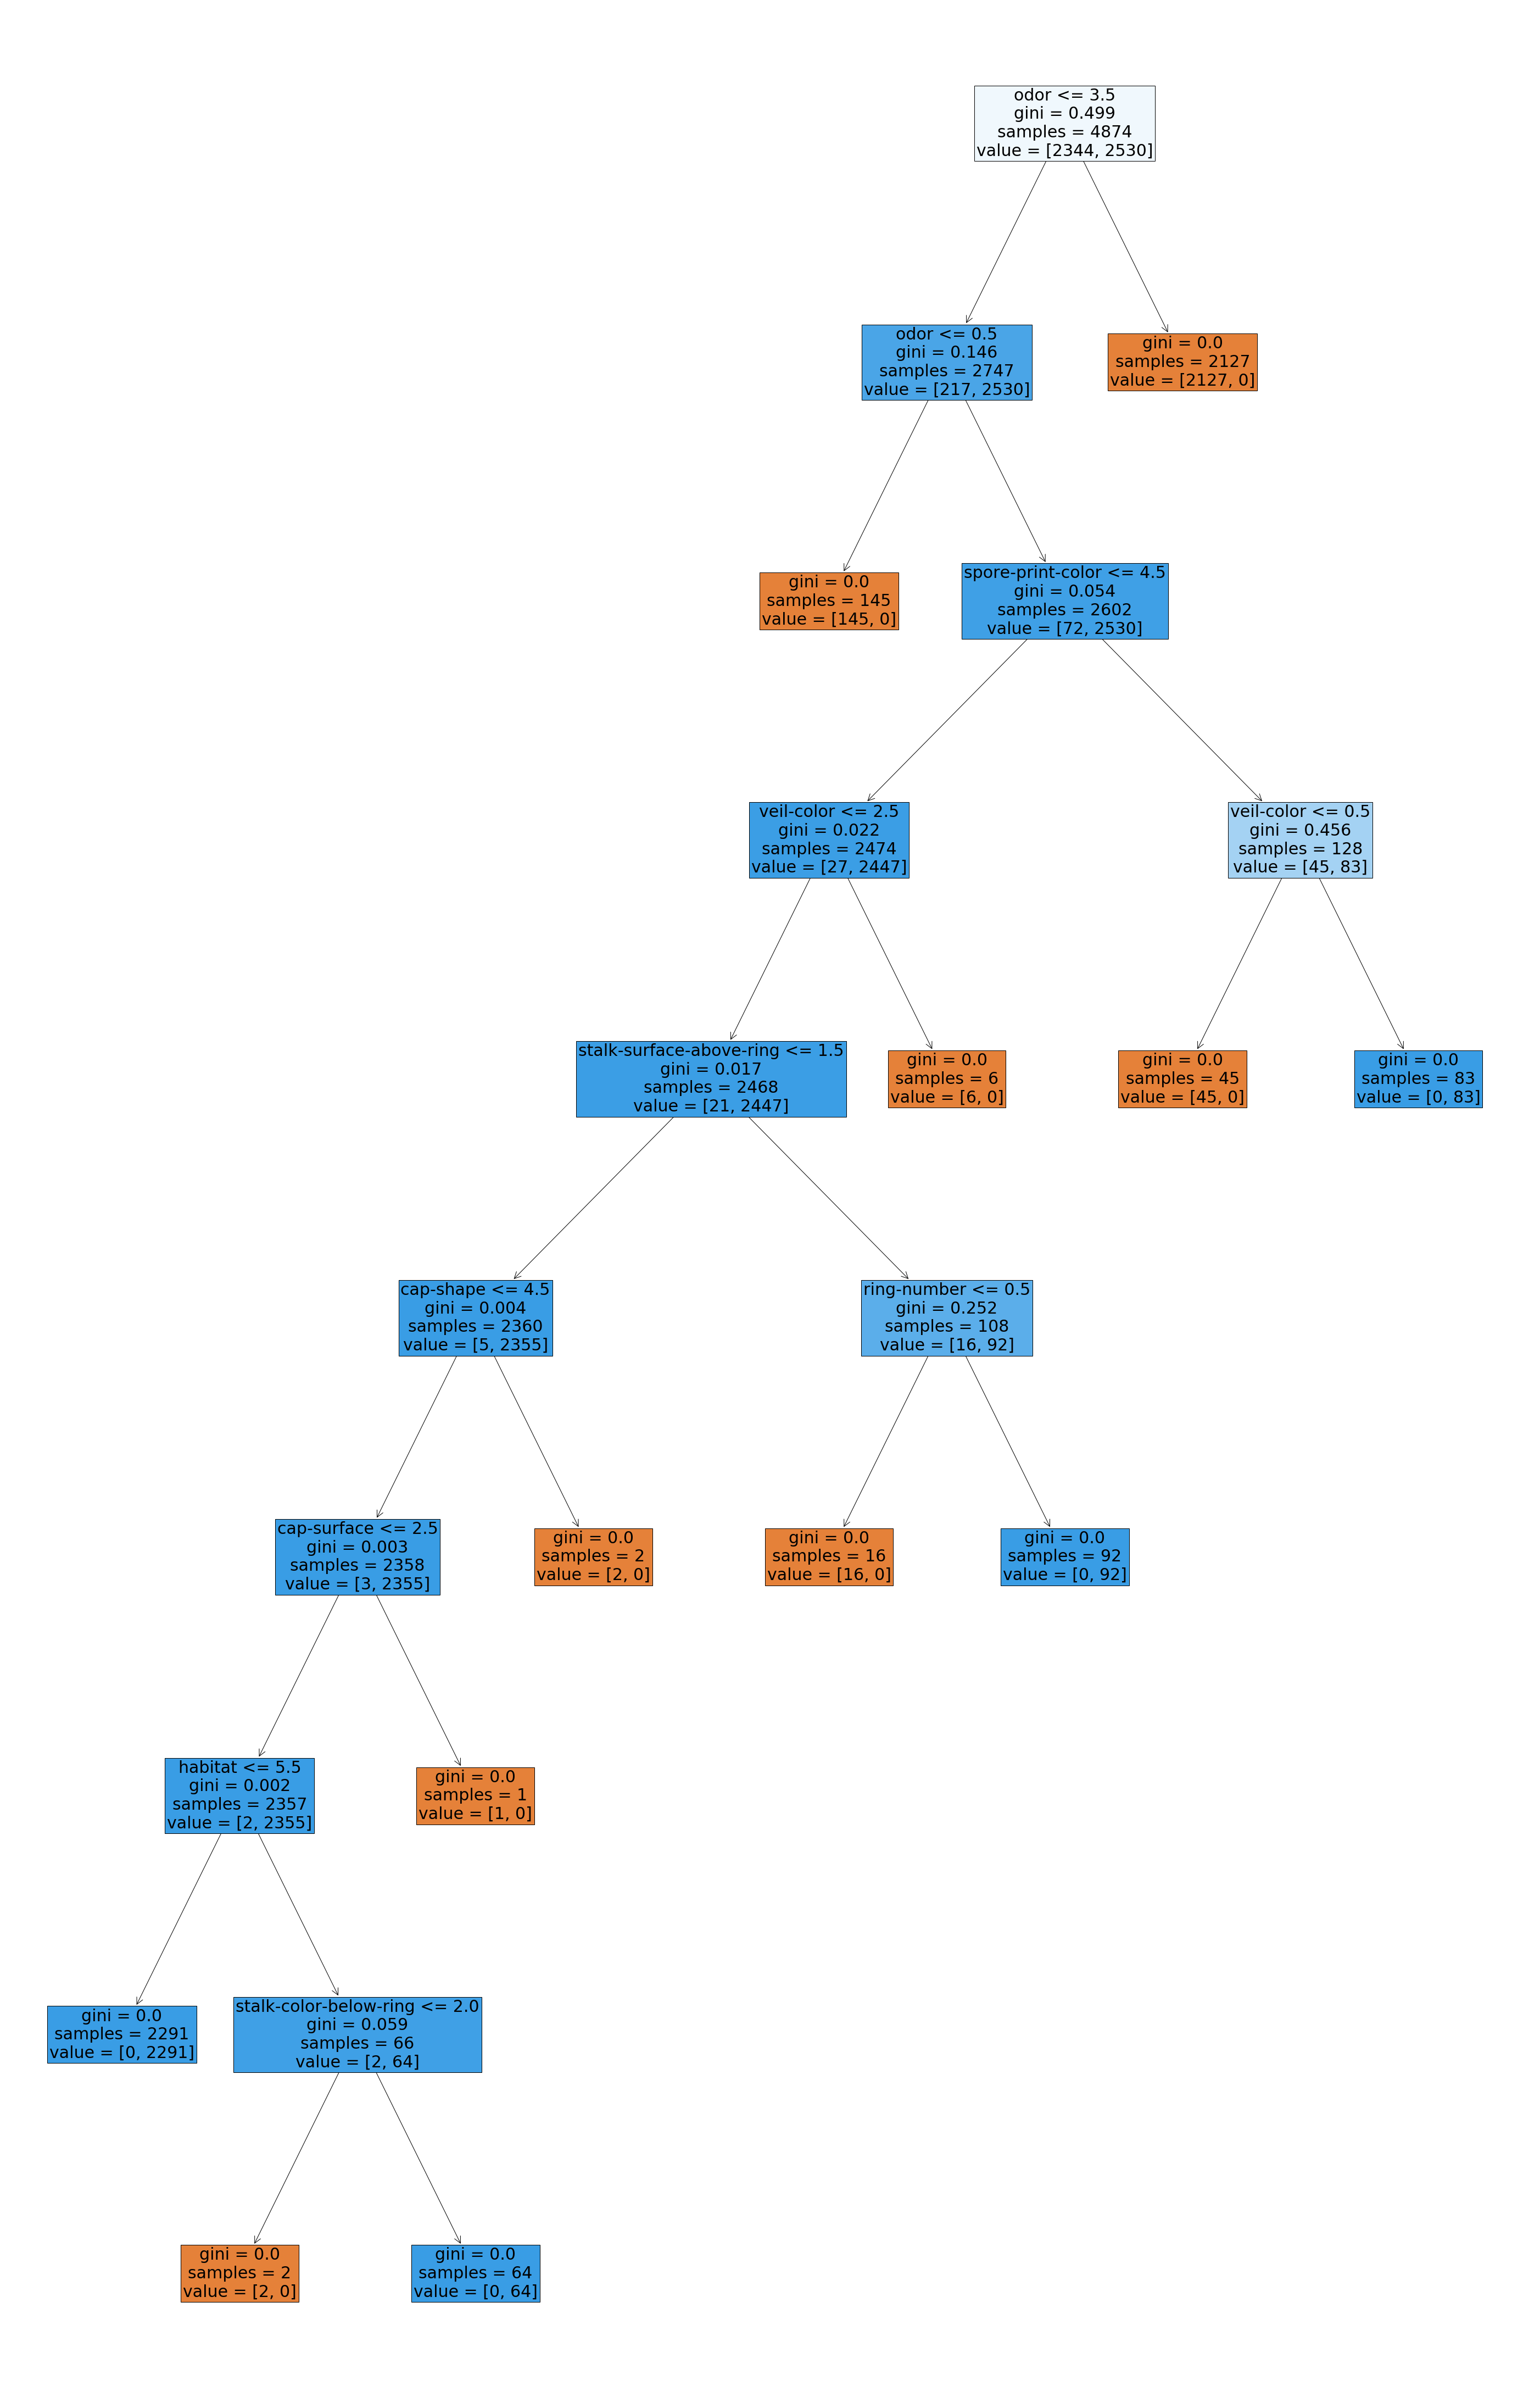

In [24]:
tree.plot_tree(DT.fit(Xtrain, ytrain), filled=True, fontsize=30,feature_names = features_all)
rcParams['figure.figsize'] = 50,80
plt.show()